### FSK Modulation and Demodulation
#### Theory
Frequency Shift Keying (FSK) is a digital modulation technique in which the frequency of a carrier signal is varied according to the digital data being transmitted. It is widely used in communication systems due to its robustness against noise and simplicity in implementation. In FSK, binary data is represented by two distinct frequencies: one frequency (f1) for binary '1' and another frequency (f0) for binary '0'. The modulated signal can then be transmitted over a communication channel.
The demodulation process involves recovering the original digital signal from the modulated waveform. This is achieved by analyzing the frequency components of the received signal and mapping them back to their corresponding binary values.
#### Objective
1. To understand the concept of Frequency Shift Keying (FSK) modulation and demodulation.
2. To implement the Unipolar Non-Return-to-Zero (NRZ) encoding for digital data representation.
3. To generate an FSK modulated signal using two distinct frequencies for binary '1' and '0'.
4. To demodulate the FSK signal and recover the original digital data.
5. To visualize the digital signal, FSK modulated signal, and demodulated signal using plots.

In [140]:
import numpy as np
from matplotlib import pyplot as plt

In [141]:
def unipolar_nrz(data, sampling_rate: int = 100, duration: float = 1.0):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start:end] = bit
    return time, signal

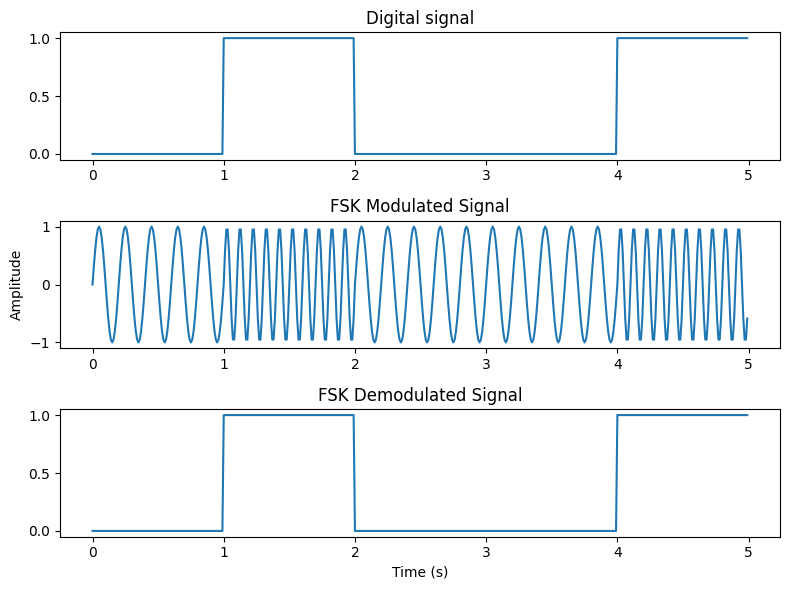

In [142]:
data = np.random.randint(0, 2, 5)
sampling_rate, duration = 100, 1
time, dsignal = unipolar_nrz(data, sampling_rate, duration)
f1, f0 = 10, 5
modulated_signal = np.zeros_like(dsignal)
for i in range(0, len(dsignal), sampling_rate):
    time_segment = time[i : i + sampling_rate]
    modulated_signal[i : i + sampling_rate] = np.sin(2 * np.pi * f1 * time_segment) if dsignal[i] == 1 else np.sin(2 * np.pi * f0 * time_segment)

demodulated_signal = np.zeros_like(dsignal)
segment_time = time[0:sampling_rate]
segment_f1 = np.sin(2 * np.pi * f1 * segment_time)
segment_f0 = np.sin(2 * np.pi * f0 * segment_time)
for i in range(0, len(modulated_signal), sampling_rate):
    segment = modulated_signal[i: i+sampling_rate]
    score_1 = np.mean(segment*segment_f1)
    score_0 = np.mean(segment*segment_f0)
    demodulated_signal[i: i+sampling_rate] = 1 if score_1>score_0 else 0

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(time, dsignal)
plt.title("Digital signal")

plt.subplot(3, 1, 2)
plt.plot(time, modulated_signal)
plt.title("FSK Modulated Signal")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(time, demodulated_signal)
plt.title("FSK Demodulated Signal")
plt.xlabel("Time (s)")

plt.tight_layout()